In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [7]:


# Load and preprocess the data (replace 'your_data.csv' with your data file)
data = pd.read_csv('iris.csv')

# Encode labels into numerical values if needed

# Split the data into features (X) and labels (y)
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]  # Labels

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy

accuracy = accuracy_score(y_train, classifier.predict(X_train))
print(f"Accuracy of train: {accuracy}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of test: {accuracy}")


Accuracy of train: 1.0
Accuracy of test: 0.9


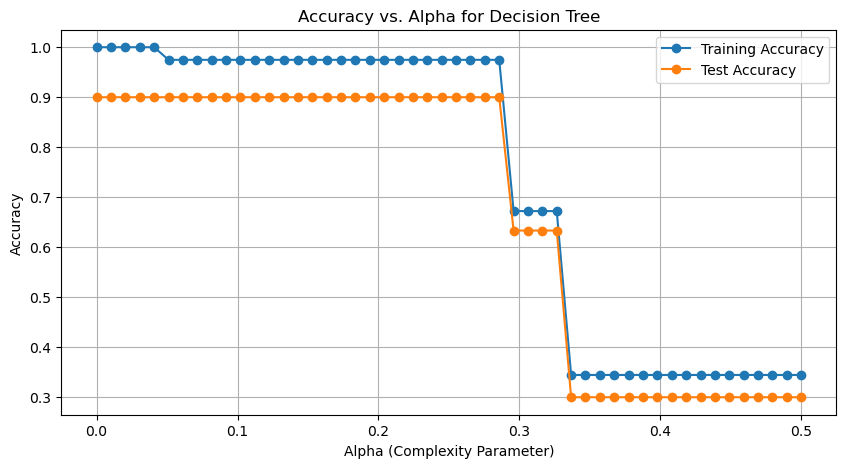

Best Alpha: 0.0, Best Test Accuracy: 0.9


In [21]:

alpha_values = np.linspace(0, 0.5, 50)  # A range of alpha values between 0 and 0.1

train_accuracies = []  # To store training accuracies
test_accuracies = []   # To store test accuracies

for alpha in alpha_values:
    # Create and train a Decision Tree classifier with the current alpha
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)

    # Calculate accuracy on the training data
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate accuracy on the test data
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the accuracy values for different alpha values
plt.figure(figsize=(10, 5))
plt.plot(alpha_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(alpha_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Alpha (Complexity Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# Find the alpha that gives the highest test accuracy
best_alpha = alpha_values[test_accuracies.index(max(test_accuracies))]
print(f"Best Alpha: {best_alpha}, Best Test Accuracy: {max(test_accuracies)}")
